# Лабораторная работа №8. Кластеризация

Выполнил студент группы 12002209 Телятников Максим Евгеньевич

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les08
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Ирисы Фишера — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном.

In [2]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0


1. Импортируйте модель данных "Ирисы Фишера".

In [23]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


2. Выполните нормализацию данных

In [24]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

scaler = MinMaxScaler()

df_scaled = df.drop(columns=['target'])
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=iris.feature_names)

df_scaled['target'] = iris.target

print(df_scaled.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


3. Постройте модель кластеризации используя алгоритм  DBSCAN (https://www.youtube.com/watch?v=svAtnZ5XjSI&t=494s), подберите подходящие параметры eps, min_samples

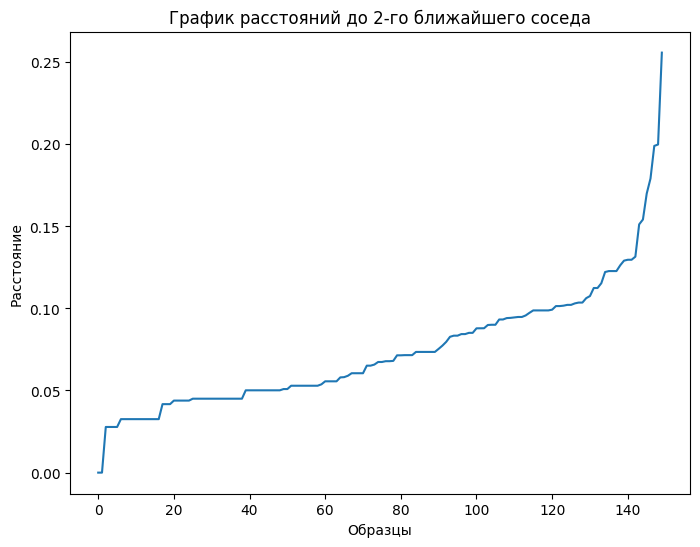

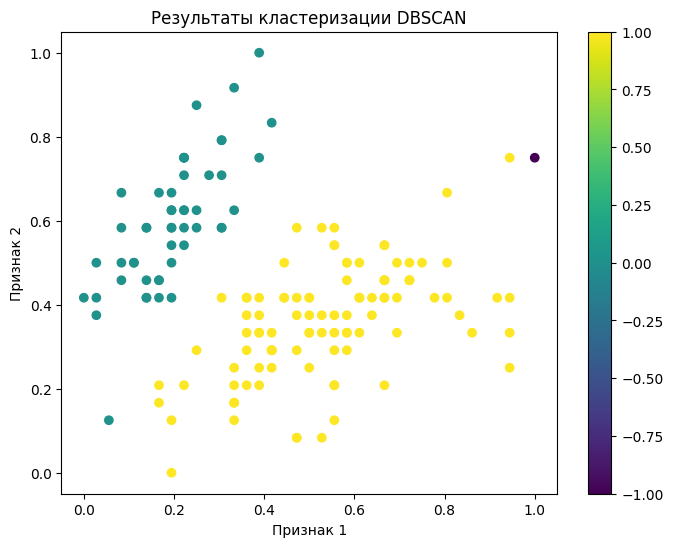

Уникальные метки кластеров: [-1  0  1]


In [25]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors

iris = load_iris()
X = iris.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 1], axis=0)

plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('График расстояний до 2-го ближайшего соседа')
plt.xlabel('Образцы')
plt.ylabel('Расстояние')
plt.show()

eps = 0.3
dbscan = DBSCAN(eps=eps, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('Результаты кластеризации DBSCAN')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.colorbar()
plt.show()

print(f'Уникальные метки кластеров: {np.unique(clusters)}')

4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров

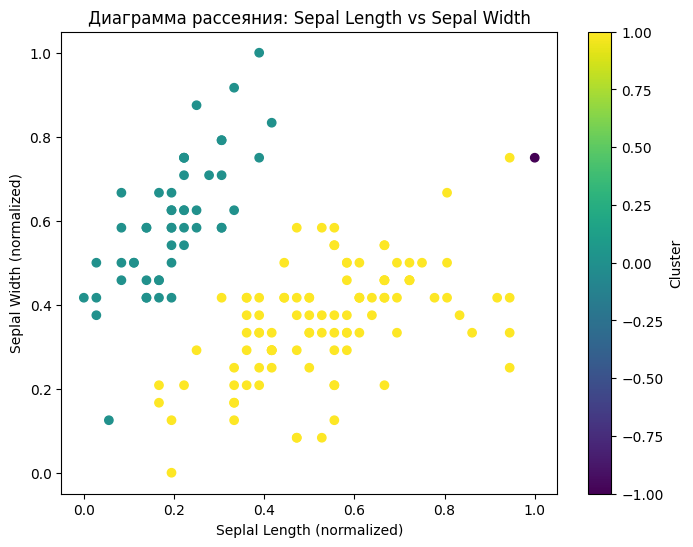

Уникальные метки кластеров: [-1  0  1]


In [26]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

eps = 0.3
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o')

plt.title('Диаграмма рассеяния: Sepal Length vs Sepal Width')
plt.xlabel('Seplal Length (normalized)')
plt.ylabel('Seplal Width (normalized)')
plt.colorbar(label='Cluster')
plt.show()

print(f'Уникальные метки кластеров: {np.unique(clusters)}')

5. Сделайте вывод

Вывод: В ходе выполнения заданий мы применили алгоритм DBSCAN для кластеризации набора данных "Ирисы Фишера", нормализовав данные с помощью Min-Max Scaler. Мы выбрали оптимальные параметры eps и min_samples, используя метод ближайших соседей для оценки eps, и применили алгоритм для выявления кластеров и шума. Визуализация кластеров на диаграмме рассеяния показала, как DBSCAN разделяет данные на несколько кластеров, а также обнаруживает аномальные точки. Результаты подтверждают, что DBSCAN эффективен для кластеризации данных с шумом и произвольной формой кластеров, при этом правильный выбор параметров критически важен для качества кластеризации.

## Вопросы

---

#### 1. **В чем состоит задача кластеризации?**

Задача кластеризации заключается в разделении набора данных на группы (кластеры) таким образом, чтобы объекты внутри одного кластера были похожи друг на друга, а объекты из разных кластеров — отличались. Кластеризация используется для поиска скрытых структур в данных без использования заранее известных меток.

---

#### 2. **Для каких целей используется кластеризация?**

Кластеризация используется для:
- **Сегментации данных**: Например, разделение клиентов на группы для маркетинга.
- **Обнаружения аномалий**: Выделение выбросов (шума) в данных.
- **Сжатия данных**: Уменьшение объема данных путем замены группы объектов на их центр.
- **Исследовательского анализа данных**: Поиск закономерностей и структуры в данных.

---

#### 3. **Алгоритм кластеризации Ллойда (K-средних)**

Алгоритм K-средних (K-means) — это итеративный алгоритм кластеризации, который разделяет данные на \( K \) кластеров. Основные шаги:
1. **Инициализация**: Выбираются \( K \) начальных центров кластеров (случайно или с использованием специальных методов).
2. **Назначение кластеров**: Каждый объект назначается ближайшему центру кластера.
3. **Обновление центров**: Центры кластеров пересчитываются как среднее значение всех объектов в кластере.
4. **Повторение**: Шаги 2 и 3 повторяются до тех пор, пока центры кластеров не перестанут изменяться.

---

#### 4. **Как выбрать количество кластеров для алгоритма K-средних?**

Для выбора количества кластеров \( K \) используются следующие методы:
- **Метод локтя (Elbow Method)**:
  - Строится график зависимости суммы квадратов расстояний (SSE) от числа кластеров.
  - Оптимальное \( K \) выбирается в точке "изгиба" (локтя) графика.
- **Метод силуэта (Silhouette Score)**:
  - Оценивается качество кластеризации для разных \( K \).
  - Оптимальное \( K \) соответствует максимальному значению силуэта.
- **Экспертные знания**: Использование предметной области для выбора \( K \).

---

#### 5. **Алгоритм DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, основанный на плотности. Основные шаги:
1. **Выбор параметров**:
   - `eps` (epsilon): Максимальное расстояние между двумя точками, чтобы они считались соседями.
   - `min_samples`: Минимальное количество точек для формирования кластера.
2. **Поиск соседей**:
   - Для каждой точки находятся все соседи в радиусе `eps`.
3. **Формирование кластеров**:
   - Если точка имеет не менее `min_samples` соседей, она становится ядром кластера.
   - Все достижимые точки из ядра добавляются в кластер.
4. **Шум**:
   - Точки, не попавшие ни в один кластер, считаются шумом (выбросами).